<a href="https://colab.research.google.com/github/Iannoh-png/Week-2-Assignment-AI-Module./blob/main/Week_2_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Load the dataset
df = pd.read_csv("sustainable energy.csv")

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

In [21]:
#Drop non predictive columns (e.g., names, IDs, coordinates unless needed)
df = df.drop(columns=['Entity', 'Latitude', 'Longitude'])

In [22]:
# Clean column names
df.columns = df.columns.str.replace('\n', ' ').str.strip()



In [23]:
# Rename and clean the Density column
if 'Density\\n(P/Km2)' in df.columns:
    df.rename(columns={'Density\\n(P/Km2)': 'Density (P/Km2)'}, inplace=True)
df['Density (P/Km2)'] = pd.to_numeric(df['Density (P/Km2)'].astype(str).str.replace(',', ''), errors = 'coerce')

In [24]:
# Drop rows with missing target values
df = df.dropna(subset=['Access to electricity (% of population)'])


In [25]:
# Fill remaining missing values with the median
df_filled = df.fillna(df.median(numeric_only=True))


In [26]:
#Define features and target
X = df_filled.drop(columns=['Access to electricity (% of population)', 'Year'])
y = df_filled['Access to electricity (% of population)']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
 # Initialize and train the Gradient Boosting model
 model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
 model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

In [30]:
# Print metrics - squared=False should now be valid
print("MAE:", mean_absolute_error(y_test, y_pred))
# Calculate RMSE by taking the square root of the MSE result
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

MAE: 3.4748056153971074
RMSE: 5.769459678341876
R2: 0.9642336559607614


In [31]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_
feature_names = X.columns

In [32]:
# Create a DataFrame for sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending = False)

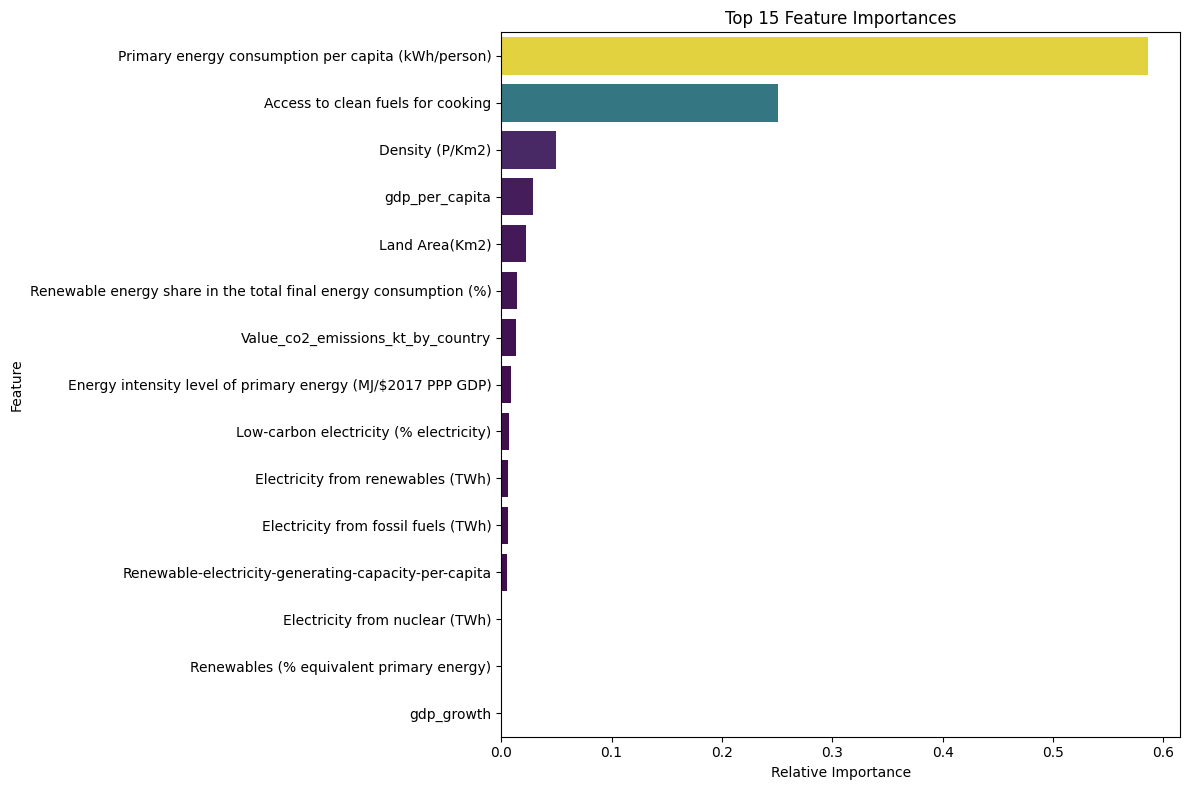

In [35]:
# Plot the top 15
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis', hue = 'Importance', legend=False)
plt.title('Top 15 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()